# Machine Learning applied to MuJoCo environment – Inverse Kinematics

* ### Author: Mowibox (Ousmane THIONGANE)
* ### Date: November 4th, 2024

## Imports

In [15]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from utils import dispIK_2R, dispIK_3R, Model, angular_loss

## I - Loading the models

In [16]:
models_dir = 'models'
MODELS_2R = []
MODELS_3R = []

if os.path.exists(models_dir) and os.path.isdir(models_dir):
    for filename in os.listdir(models_dir):
        filepath = os.path.join(models_dir, filename)
        if os.path.isfile(filepath) and filename.endswith('.keras'):
            if '2R' in filename:
                print(f"2R Model found : {filename}")
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                MODELS_2R.append(model)
            elif '3R' in filename:
                print(f"3R Model found : {filename}")
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                MODELS_3R.append(model)
else:
    print(f"The folder '{models_dir}' does not exists!")


print(f"Number of 2R models : {len(MODELS_2R)}")
print(f"Number of 3R models : {len(MODELS_3R)}")

2R Model found : NN1_2R_p10_e20.keras
3R Model found : NN1_3R_p10_e20.keras
2R Model found : NN2_2R_p10_e20.keras
3R Model found : NN2_3R_p10_e20.keras
2R Model found : NN3_2R_p10_e20_raw.keras
3R Model found : NN3_3R_p10_e20_raw.keras
2R Model found : NN4_2R_p10_e20_raw.keras
3R Model found : NN4_3R_p10_e20_raw.keras
Number of 2R models : 4
Number of 3R models : 4


## I - Inverse Kinematics - Newton-Raphson method

# 1.1) 2R Robot

===== Step n°0 =====
Current Position: [-0.00577127  0.14055167]
Intermediate joint angles: [0.7853982 1.5707964]

===== Step n°1 =====
Current Position: [-0.07637904 -0.02082408]
Intermediate joint angles: [-1.5466189  3.887857 ]

===== Step n°2 =====
Current Position: [-0.10620697  0.17556694]
Intermediate joint angles: [1.9047437  0.35425305]

===== Step n°3 =====
Current Position: [-0.14413303  0.05619736]
Intermediate joint angles: [  8.261505 -17.375381]

===== Step n°4 =====
Current Position: [ 0.17376517 -0.11068507]
Intermediate joint angles: [  5.4632545 -12.034024 ]

===== Step n°5 =====
Current Position: [ 0.14440894 -0.07322843]
Intermediate joint angles: [  5.0954943 -11.181624 ]

===== Step n°6 =====
Current Position: [ 0.14672399 -0.0947861 ]
Intermediate joint angles: [  5.119184 -11.408973]

===== Step n°7 =====
Current Position: [ 0.1495976  -0.08041143]
Intermediate joint angles: [  5.1585464 -11.33337  ]

===== Step n°8 =====
Current Position: [ 0.14999864 -0.07999

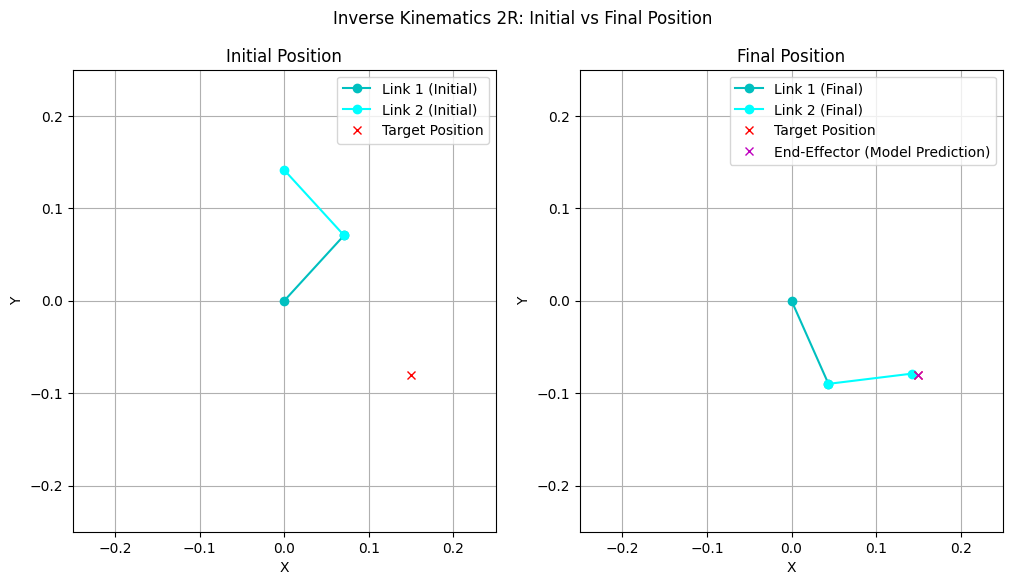

Distance error: 0.007052218754471847



In [17]:
model_2R = MODELS_2R[1].model
name_2R = MODELS_2R[1].get_name()

if 'raw' in name_2R:
    raw = True
else: 
    raw = False
    
target_position = [0.15, -0.08] 
initial_guess = [np.pi/4, np.pi/2]  
dispIK_2R(model_2R, target_position, initial_guess, raw, display_error=True)

# 1.2) 3R Robot

===== Step n°0 =====
Current Position: [ 0.26104513 -0.04780866]
Intermediate joint angles: [-0.7853982  0.5235988  0.7853982]

===== Step n°1 =====
Current Position: [0.18919758 0.09296998]
Intermediate joint angles: [-4.7157965  4.2176037  6.8572598]

===== Step n°2 =====
Current Position: [-0.04398592  0.03712716]
Intermediate joint angles: [-3.4591832  -0.66109514  9.440165  ]

===== Step n°3 =====
Current Position: [-0.15273404  0.07467226]
Intermediate joint angles: [-4.484077   0.5148841  8.161032 ]

===== Step n°4 =====
Current Position: [-0.24265784  0.05131046]
Intermediate joint angles: [-3.6790373  -0.21108669  7.6436124 ]

===== Step n°5 =====
Current Position: [-0.23863624  0.10385276]
Intermediate joint angles: [-3.785844  -0.2804895  7.552534 ]

===== Step n°6 =====
Current Position: [-0.25281432  0.09661213]
Intermediate joint angles: [-3.707227  -0.2534978  7.4019103]

===== Step n°7 =====
Current Position: [-0.2499061   0.09978508]
Intermediate joint angles: [-3.7244

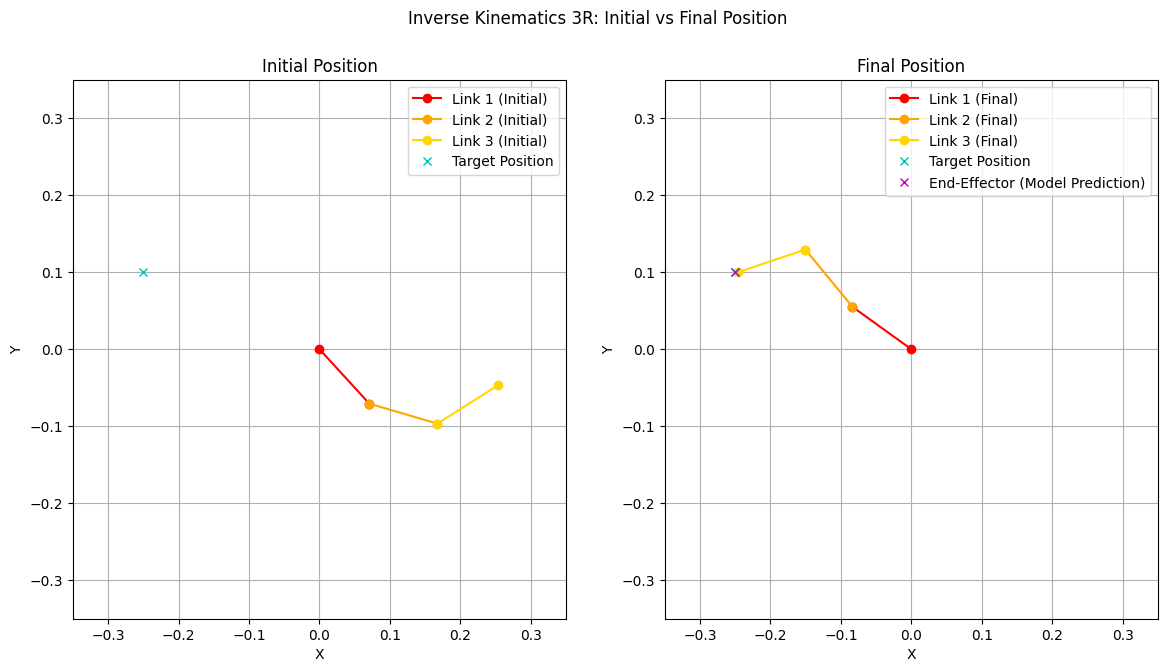

Distance error: 0.004031561302590336



In [18]:
model_3R = MODELS_3R[1].model
name_3R = MODELS_3R[1].get_name()

if 'raw' in name_3R:
    raw = True
else: 
    raw = False

target_position = [-0.25, 0.1] 
initial_guess = [-np.pi/4, np.pi/6, np.pi/4]  
dispIK_3R(model_3R, target_position, initial_guess, raw, display_error=True)